# Random Forest
In this notebook, we fit a RF to the regression problem of predicting mean activity based on non-wearable features taken from the UK biobank but with PCA components.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

In [5]:
# Path to dataset
PATH = '/cdtshared/wearables/students/group5/'

# Features from biobank
X_train = pd.read_pickle(PATH+"XtrainPCAELLIE.pkl")
X_val = pd.read_pickle(PATH+"XvalPCAELLIE.pkl")
X_test = pd.read_pickle(PATH+"XtestPCAELLIE.pkl")
# Outcome
y_train = pd.read_pickle(PATH+"ytrainPCAELLIE.pkl")
y_val = pd.read_pickle(PATH+"yvalPCAELLIE.pkl")
y_test = pd.read_pickle(PATH+"ytestPCAELLIE.pkl")

## Data prep

In [6]:
print(X_train.shape)

(60829, 60)


# Random Forest

In [7]:
%cd ..
%cd ..
from time import time
from sklearn.ensemble import RandomForestRegressor
from accel.training import model_tune, score

/cdthome
/


## Timing
Timing how long it takes to fit an SVM to different sizes of data. Keep in mind, there are 69567 training observations.

In [8]:
Ns = np.arange(100,10001,1000)
Ns

array([ 100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100])

In [9]:
reps = 5
times = np.zeros((reps,len(Ns)))

for r in range(reps):
    print("Rep",r, "Size:", end="")
    for i in range(len(Ns)):
        print(Ns[i],end=", ")
        N = Ns[i]
        clf = RandomForestRegressor() # default RF
        start = time()
        clf.fit(X_train[:N], y_train[:N ]) #train model and time
        times[r,i] = time() - start
    print()

Rep 0 Size:100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 
Rep 1 Size:100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 
Rep 2 Size:100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 
Rep 3 Size:100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 
Rep 4 Size:100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 


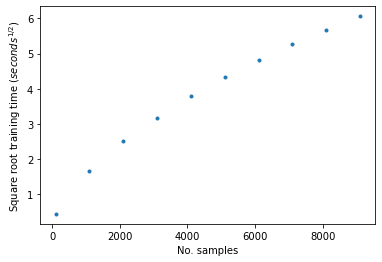

In [10]:
plt.plot(Ns, np.sqrt(np.mean(times,axis=0)), ".")
plt.xlabel("No. samples")
plt.ylabel("Square root training time ($seconds^{1/2}$)")
plt.show()

In [11]:
root_mean_times = np.sqrt(np.mean(times,axis=0))
m = root_mean_times[-1] / Ns[-1]
m

0.0006656482136286831

In [12]:
# Time it takes for 9000 samples
(m * 9100)

6.057398744021016

In [13]:
N_train = X_train.shape[0]
pred_secs = (m * N_train)**2 #answer in seconds
print("Predicted training time in minutes", pred_secs / 60) # answer in minutes

Predicted training time in minutes 27.324966939001804


In [14]:
# fitting the classifier
clf = RandomForestRegressor()
start = time()
clf.fit(X_train, y_train) #train model and time
time() - start

331.4826922416687

How good is the out the box model?

In [15]:
from accel.training import score

In [16]:
y_pred = clf.predict(X_val)

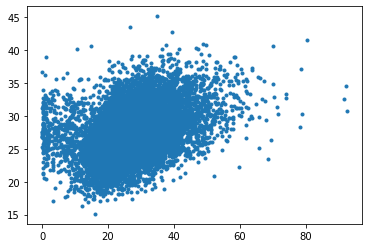

In [17]:
plt.plot(y_val,y_pred, ".")

In [18]:
score(y_val, y_pred)

MSE is:  71.7169599547204
R2 is:  0.14847116293092566
Explained variance is: 0.14847335427542419


(<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 <function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>,
 <function sklearn.metrics._regression.explained_variance_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>)

# Hyper-parameter tuning
We perform hyper-parameter tuning on the linear SVM since it is less time-consuming to fit

In [19]:
from accel.training import model_tune

In [20]:
y_train.std()

9.311881251340733

In [21]:
# define lists of params interested in

# Number of trees in random forest
n_estimators = [10, 25, 50, 100, 150]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 50]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [22]:
# Get the optimal parameters
model_tune(RandomForestRegressor(), 
                 params, X_train, y_train, X_val, y_val, 20)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits


/cdthome/xqe353/.conda/envs/cdt_wearables/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits


/cdthome/xqe353/.conda/envs/cdt_wearables/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits


/cdthome/xqe353/.conda/envs/cdt_wearables/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best parameter combo: OrderedDict([('bootstrap', True), ('max_depth', 50), ('max_features', 'auto'), ('min_samples_leaf', 4), ('min_samples_split', 10), ('n_estimators', 100)])
Best validation MSE: 1.559428783232807e-01


BayesSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
              estimator=RandomForestRegressor(), n_iter=20, refit=False,
              search_spaces={'bootstrap': [True, False],
                             'max_depth': [10, 50, None],
                             'max_features': ['auto', 'sqrt'],
                             'min_samples_leaf': [2, 4, 10],
                             'min_samples_split': [5, 10],
                             'n_estimators': [10, 25, 50, 100, 150]},
              verbose=1)

Best parameters: <br>
**bootstrap**:True <br>
**max_depth**: 50 <br>
**max_features**: 'auto' <br>
**min_samples_leaf**: 4 <br>
**min_samples_split**: 10 <br>
**n_estimators**: 100 <br>

In [23]:
clf = RandomForestRegressor(bootstrap=True, max_depth=50, max_features='auto', min_samples_leaf = 4, min_samples_split = 10, n_estimators = 100)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=10)

MSE is:  71.27675907868286
R2 is:  0.15369787276756264
Explained variance is: 0.15371226239647828


(<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 <function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>,
 <function sklearn.metrics._regression.explained_variance_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>)

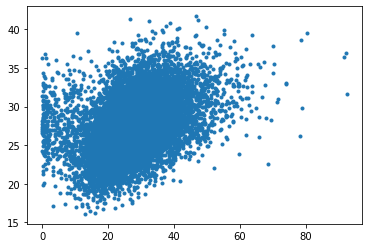

In [24]:
y_pred = clf.predict(X_val)
plt.plot(y_val,y_pred, ".")
score(y_val, y_pred)

# Test

In [27]:
X = np.vstack((X_train, X_val))
y = np.concatenate([y_train, y_val])

In [29]:
model = RandomForestRegressor(bootstrap=True, max_depth=50, max_features='auto', min_samples_leaf = 4, min_samples_split = 10, n_estimators = 100)
model.fit(X, y)

RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=10)

In [30]:
# Get the test set performance
score(y_test, model.predict(X_test))

MSE is:  73.25822035640746
R2 is:  0.14723517205952785
Explained variance is: 0.14723563448158772


(<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 <function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>,
 <function sklearn.metrics._regression.explained_variance_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>)